# Importando as funções e bibliotecas usadas no código 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

# Função que irá fornecer o dataset normalizado

In [60]:
def normalizae():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    df = pd.read_csv(url, header=None)

    # Convertendo o dataframe e um NumpyArray
    df = df.drop(columns=[0])
    data = df.values

    # Normalizando o array
    scaler = MinMaxScaler()
    X = scaler.fit_transform(data)
    # X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Transformando 13 variáveis númericas em 3
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    
    # Retornando o DataFrame que sera usado no kmeans e os labels corretos (para comparar depois)
    return pd.DataFrame(X_pca), pd.DataFrame(X)

# Função do método do cotovelo

In [61]:
# Usando o método Elbow para achar o número ideal de clusteres
def elbow_method(data, min, max):
  kmeans = KMeans(n_init=10)
  vis = KElbowVisualizer(kmeans, k=(min,max))
  vis.fit(data)
  vis.poof()

# Função do silhouette

In [62]:
# Usando o silhoutte para confirmar que o 
def silhouette(dataset, k):
  info = dataset.values
  fig, ax = plt.subplots(3, 2, figsize=(15,8))
  for i in k:
    kmean = KMeans(n_clusters=i, n_init=10)
    kmean.fit(dataset)
    label = kmean.predict(dataset)
    fignum = 1
    kmean.fit(dataset)
    labels = kmean.labels_
    h, j = divmod(i,2)
    vis = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[h-1][j])
    vis.fit(info)
  plt.show()

# Função que cria o gráfico 3D

In [77]:
def graph(dataset, labels, name):
  fig = plt.figure(figsize=(10,10))
  plt.get_cmap('tab10')
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(dataset[0], dataset[1], dataset[2],c=labels, cmap="viridis")
  ax.xaxis.set_ticklabels([])
  ax.yaxis.set_ticklabels([])
  ax.zaxis.set_ticklabels([])
  ax.set_xlabel("V1")
  ax.set_ylabel("V2")
  ax.set_zlabel("V3")
  ax.set_title(name)

# Achando o k ideal para o k-means

In [64]:
k_min = 2
k_max = 21

dataset_PCA, a = normalizae()

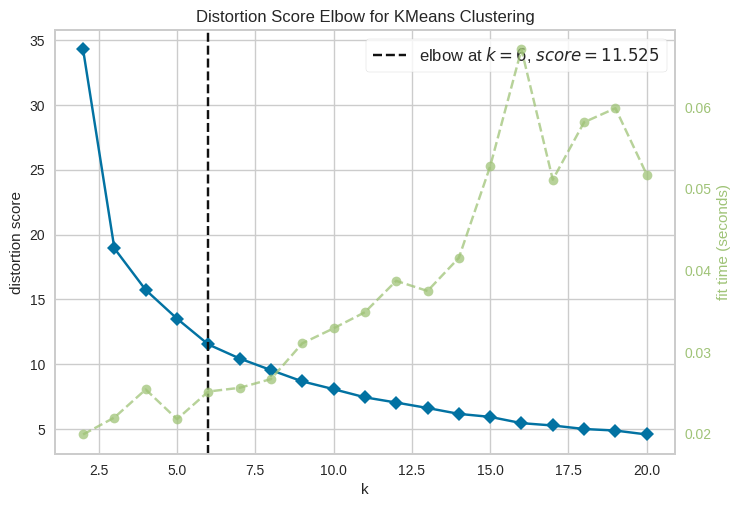

In [65]:
elbow_method(dataset_PCA, k_min, k_max)

Pelo gráfico Elbow acima, podemos notar que não há um ponto claro que possamos escolher como a quantidade ideal de clusteres, apesar do gráfico dizer que k=6 é o melhor ponto, então, em vez de simplesmente pegar 6 como o número ideal, iremos calcular o Silhouette Score para kmeans com 3, 4, 5, 6 e 7 cluesteres, de forma que o kmean com o maior Silhouette Score será o kmean com a quantidade ideal de clusteres.





Silhouette Score(n=3): 0.47796626568347655
Silhouette Score(n=4): 0.4347348309376317
Silhouette Score(n=5): 0.38734396291888396
Silhouette Score(n=6): 0.3617548418347394
Silhouette Score(n=7): 0.3109692906138748


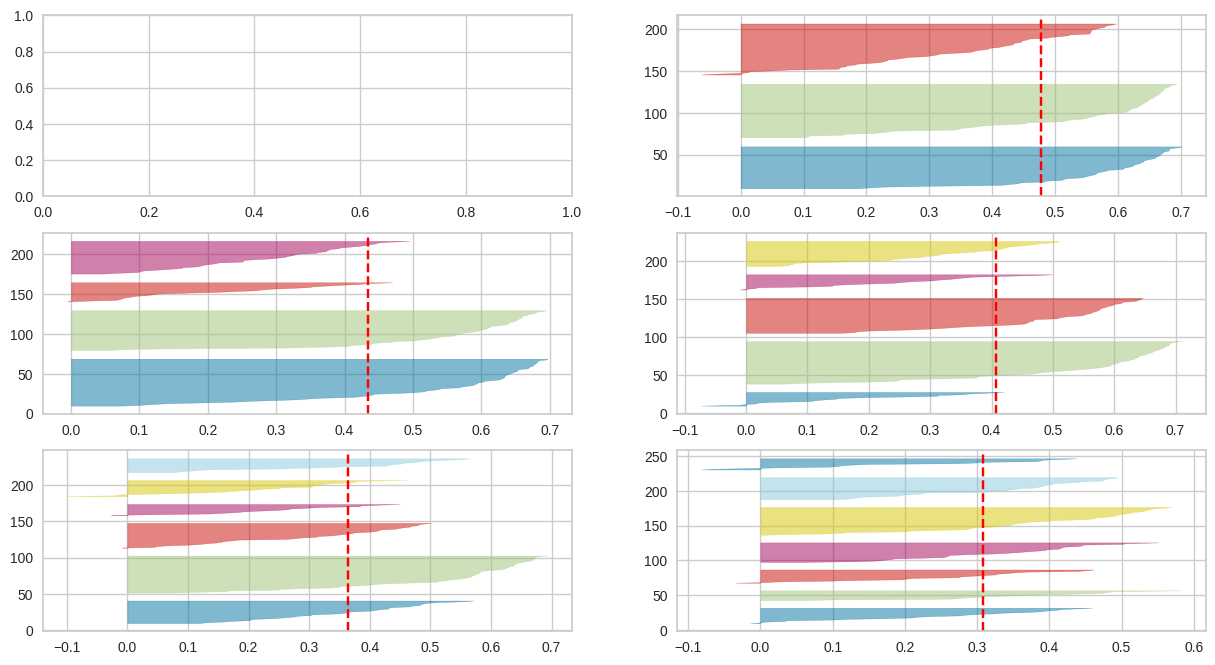

In [66]:
ks = [3, 4, 5, 6, 7]

for i in ks:
    kmean = KMeans(n_clusters=i, n_init=10)
    kmean.fit(dataset_PCA)
    label = kmean.predict(dataset_PCA)
    print(f'Silhouette Score(n={i}): {silhouette_score(dataset_PCA, label)}')
silhouette(dataset_PCA, ks)

# Resultado

Portanto, nota-se que o número ideal de clusteres para o kmean feito com esse dataset é 3, visto que possui o maior silhouette, todos os seus clusters estão acima da média (linha pontilhada vermelha) e não há uma diferença absurda no tamanho dos seus clusters.<br>
Dessa forma, nosso k-means terá o seguinte gráfico.

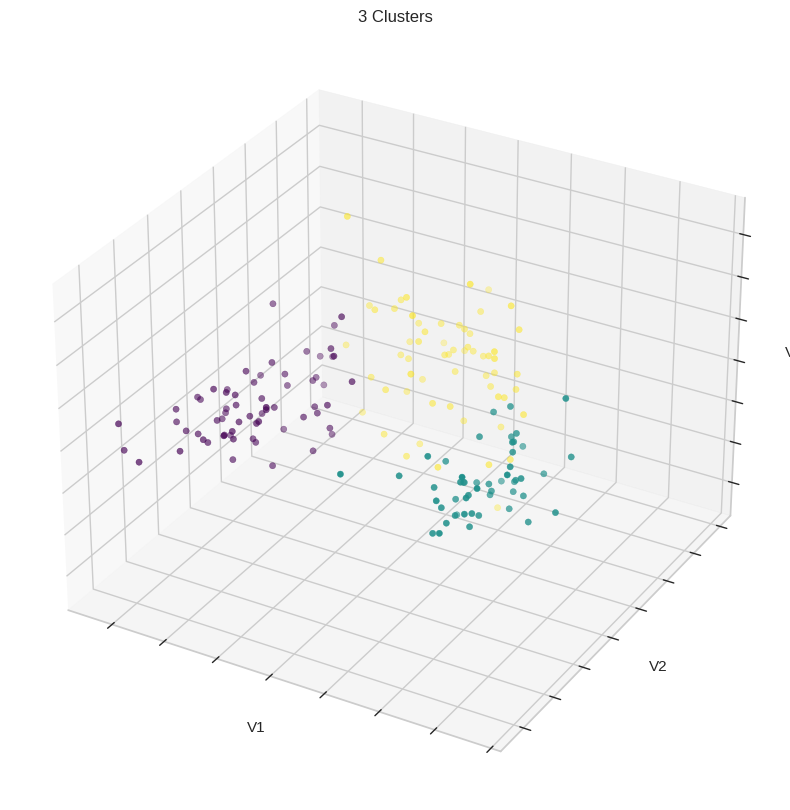

In [78]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(dataset_PCA)

graph(dataset_PCA, kmeans.labels_, "3 Clusters")

plt.show()

Sendo o mais semelhante com o gráfico dos clusters do dataset

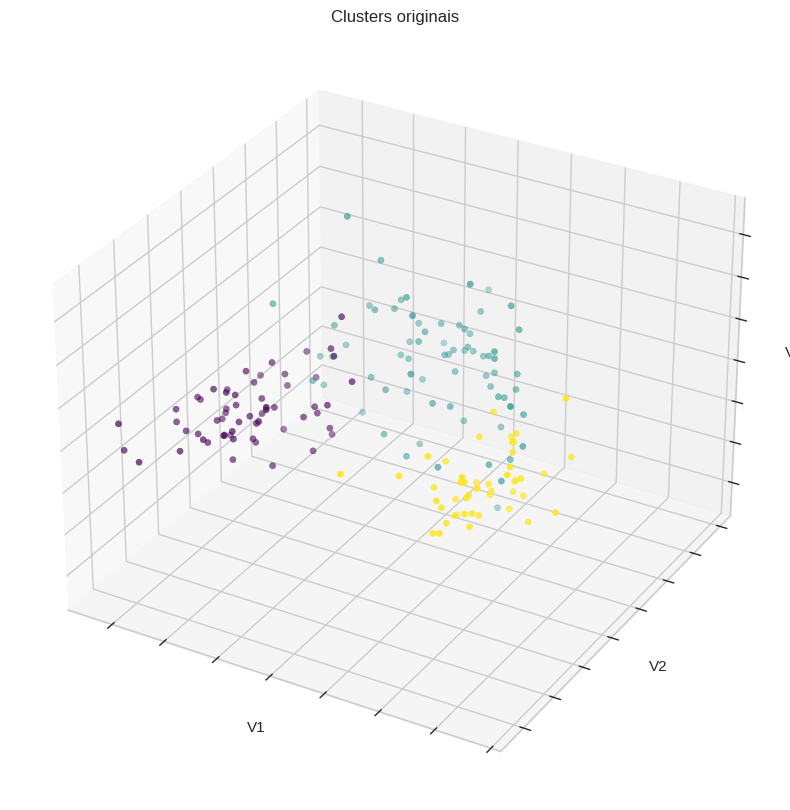

In [79]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
target = df[0]

graph(dataset_PCA, target, "Clusters originais")

plt.show()

Enquanto que o gráfico do kmeans para as outras quantidades de clusteres tem mais diferenças

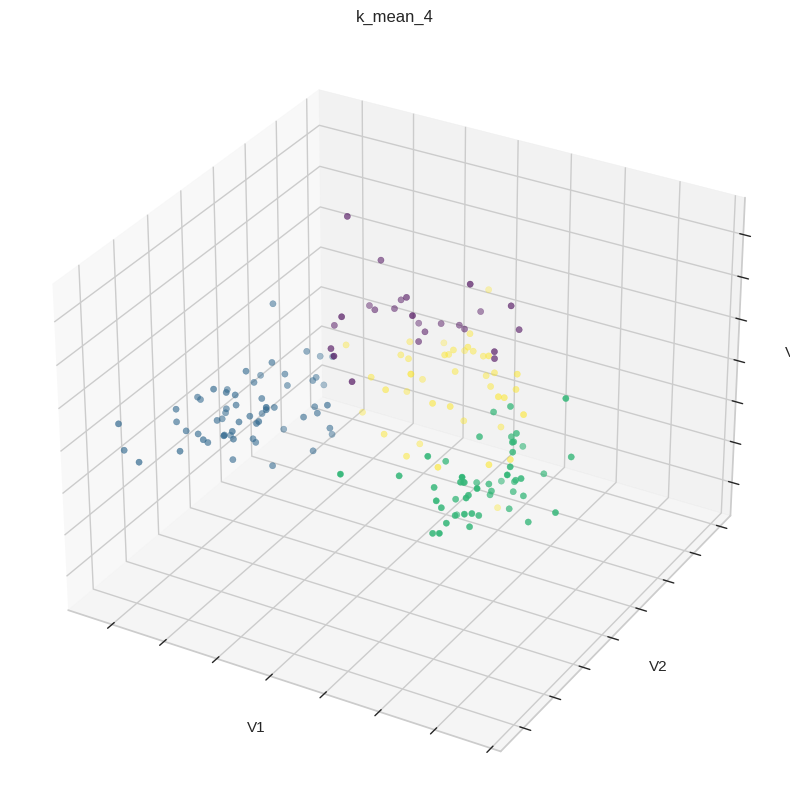

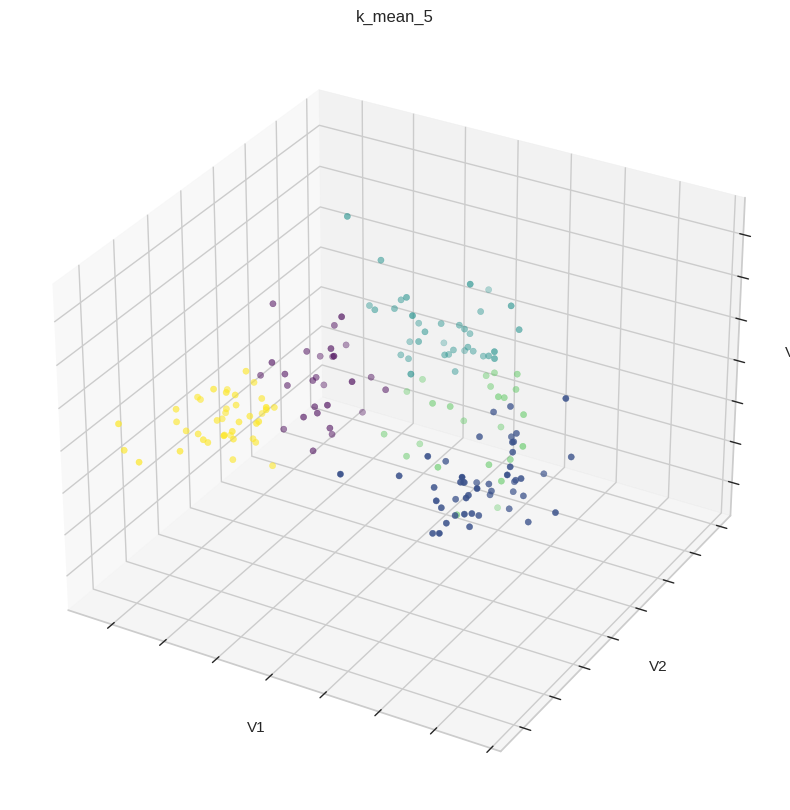

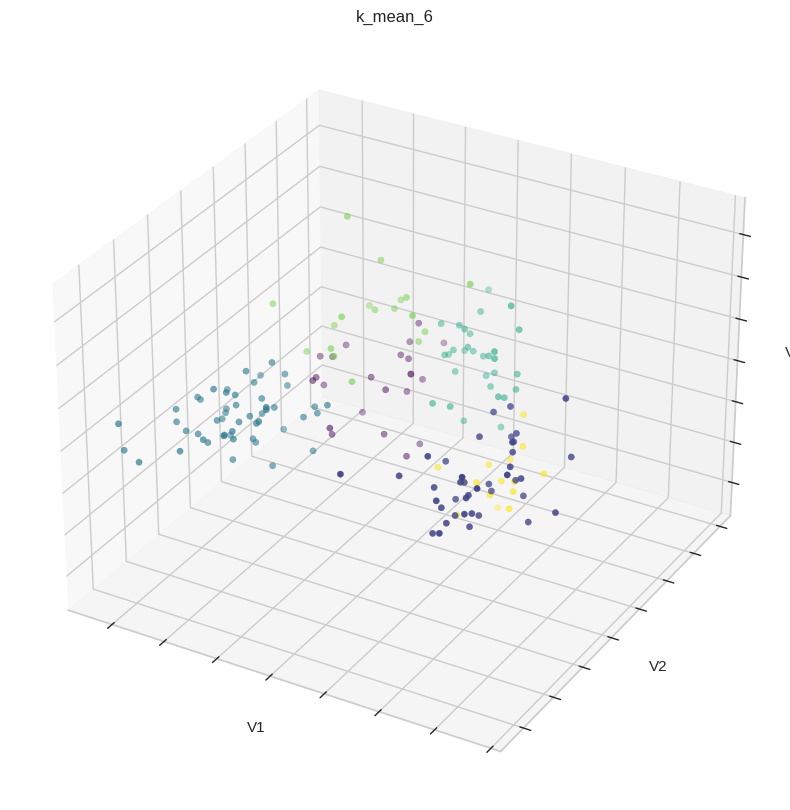

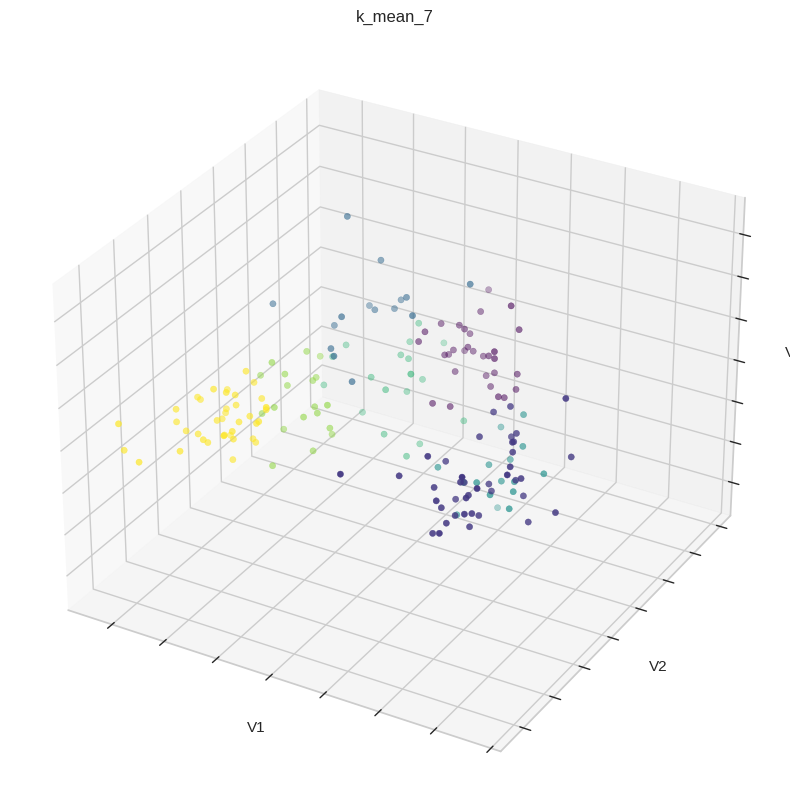

In [81]:
estimators = [
    ("k_mean_4", KMeans(n_clusters=4, n_init=10)),
    ("k_mean_5", KMeans(n_clusters=5, n_init=10)),
    ("k_mean_6", KMeans(n_clusters=6, n_init=10)),
    ("k_mean_7", KMeans(n_clusters=7, n_init=10)),
]

titles = ["4 clusters", "5 clusters", "6 clusters", "7 clusters"]

for name, est in estimators:
  est.fit(dataset_PCA)
  graph(dataset_PCA, est.labels_, name)


plt.show()